# Практическая работа №2
## по предмету "Системы искусственного интеллекта"

Целью практической работы является изучение моделей машинного обучения для задачи регрессии.

Выполните предварительную обработку и анализ набора данных.

Затем вам необходимо выбрать 3 модели машинного обучения, которые могут решать задачу регрессии, и обучить их на основе данного набора данных. Обязательным условием является построение графика изменения loss для каждой из выбранных моделей. В результате выполнения работы необходимо сделать вывод, какая из моделей лучше подошла для решения поставленной задачи.

In [23]:
import pandas as pd

df = pd.read_csv('AISP2.csv')

df.head()

brand processor_brand processor_name processor_gnrtn ram_gb ram_type  \
0    ASUS           Intel        Core i3            10th   4 GB     DDR4   
1  Lenovo           Intel        Core i3            10th   4 GB     DDR4   
2  Lenovo           Intel        Core i3            10th   4 GB     DDR4   
3    ASUS           Intel        Core i5            10th   8 GB     DDR4   
4    ASUS           Intel   Celeron Dual   Not Available   4 GB     DDR4   

      ssd      hdd       os  os_bit graphic_card_gb  weight     warranty  \
0    0 GB  1024 GB  Windows  64-bit            0 GB  Casual  No warranty   
1    0 GB  1024 GB  Windows  64-bit            0 GB  Casual  No warranty   
2    0 GB  1024 GB  Windows  64-bit            0 GB  Casual  No warranty   
3  512 GB     0 GB  Windows  32-bit            2 GB  Casual  No warranty   
4    0 GB   512 GB  Windows  64-bit            0 GB  Casual  No warranty   

  Touchscreen msoffice  Price   rating  Number of Ratings  Number of Reviews  
0          No       No  34649  2 stars                  3                  0  
1          No       No  38999  3 stars                 65                  5  
2          No       No  39999  3 stars                  8                  1  
3          No       No  69990  3 stars                  0                  0  
4          No       No  26990  3 stars                  0                  0

In [24]:
df['ram_gb'] = df['ram_gb'].str.replace(' GB', '').astype(float)
df['ssd'] = df['ssd'].str.replace(' GB', '').astype(float)
df['hdd'] = df['hdd'].str.replace(' GB', '').astype(float)
df['graphic_card_gb'] = df['graphic_card_gb'].str.replace(' GB', '').astype(float)
df['rating'] = df['rating'].str.replace(' stars', '').str.replace(' star', '').astype(float)

df = pd.get_dummies(df, 
    columns=['brand', 'processor_brand', 'processor_name', 'ram_type', 
             'os', 'os_bit', 'Touchscreen', 'msoffice', 'warranty', 'processor_gnrtn', 'weight'])

df.corr(numeric_only=True)['Price'].sort_values(ascending=False)

Price                            1.000000
ssd                              0.628272
ram_gb                           0.518323
graphic_card_gb                  0.459986
processor_name_Core i7           0.377777
processor_name_Core i9           0.359096
brand_APPLE                      0.312112
os_Mac                           0.312112
processor_name_M1                0.274581
processor_brand_M1               0.274581
processor_name_Ryzen 9           0.253506
weight_Casual                    0.247878
processor_gnrtn_12th             0.219060
Touchscreen_Yes                  0.189126
ram_type_LPDDR3                  0.181314
ram_type_LPDDR4X                 0.173809
ram_type_DDR5                    0.168689
processor_gnrtn_10th             0.164034
os_DOS                           0.140780
brand_MSI                        0.123952
msoffice_No                      0.105752
warranty_3 years                 0.080610
processor_name_Ryzen 7           0.061872
ram_type_DDR3                    0

In [25]:
from sklearn.model_selection import train_test_split

y = df['Price']

X = df.drop('Price', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

c:\Users\Serafim\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\Serafim\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\Serafim\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\Serafim\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before converg

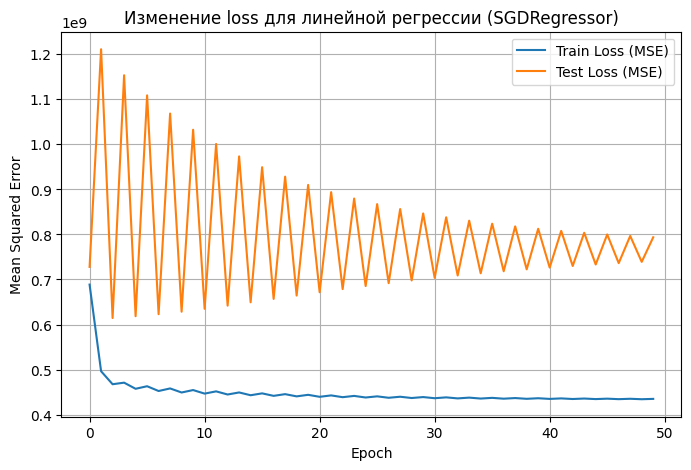

MSE  = 793687226.89
RMSE = 28172.46
R²   = 0.5927


In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score

sgd = SGDRegressor(
    loss='squared_error',
    max_iter=1,
    learning_rate='invscaling',
    eta0=0.01,
    warm_start=True,
    random_state=42
)

train_losses = []
test_losses = []

n_epochs = 50
for epoch in range(n_epochs):
    sgd.fit(X_train_scaled, y_train)
    y_train_pred = sgd.predict(X_train_scaled)
    y_test_pred = sgd.predict(X_test_scaled)
    
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    
    train_losses.append(train_mse)
    test_losses.append(test_mse)

plt.figure(figsize=(8,5))
plt.plot(range(n_epochs), train_losses, label='Train Loss (MSE)')
plt.plot(range(n_epochs), test_losses, label='Test Loss (MSE)')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('Изменение loss для линейной регрессии (SGDRegressor)')
plt.legend()
plt.grid(True)
plt.show()

y_pred = sgd.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MSE  = {mse:.2f}")
print(f"RMSE = {rmse:.2f}")
print(f"R²   = {r2:.4f}")


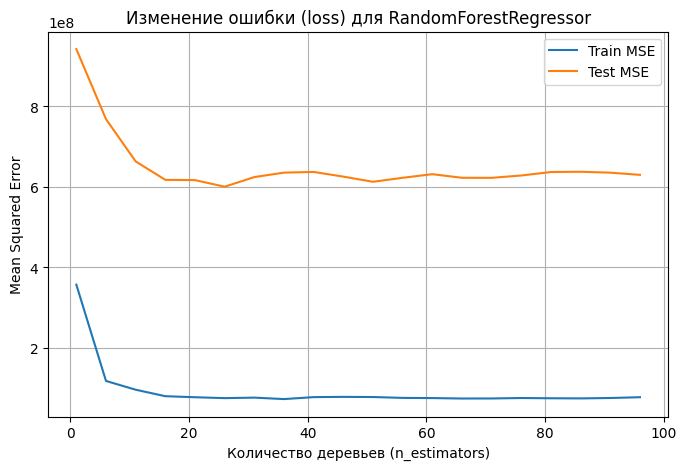

Test  MSE:  633754519.6506
Test  RMSE: 25174.4815
Test  R²:   0.6748


In [29]:
train_mse = []
test_mse = []
n_trees = range(1, 101, 5)  # шаг по 5 деревьев

for n in n_trees:
    model = RandomForestRegressor(n_estimators=n, random_state=42, n_jobs=-1)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_mse.append(mean_squared_error(y_train, y_train_pred))
    test_mse.append(mean_squared_error(y_test, y_test_pred))

plt.figure(figsize=(8,5))
plt.plot(n_trees, train_mse, label='Train MSE')
plt.plot(n_trees, test_mse, label='Test MSE')
plt.xlabel('Количество деревьев (n_estimators)')
plt.ylabel('Mean Squared Error')
plt.title('Изменение ошибки (loss) для RandomForestRegressor')
plt.legend()
plt.grid(True)
plt.show()

final_model = RandomForestRegressor(n_estimators=100, random_state=42)
final_model.fit(X_train, y_train)
y_test_pred = final_model.predict(X_test)

test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Test  MSE:  {test_mse:.4f}")
print(f"Test  RMSE: {test_rmse:.4f}")
print(f"Test  R²:   {test_r2:.4f}")


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Модель XGBoost
xgb = XGBRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    objective='reg:squarederror',
    eval_metric='rmse'
)

# Обучение с отслеживанием loss на train и test
eval_set = [(X_train, y_train), (X_test, y_test)]
xgb.fit(
    X_train, y_train,
    eval_set=eval_set,
    verbose=False
)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

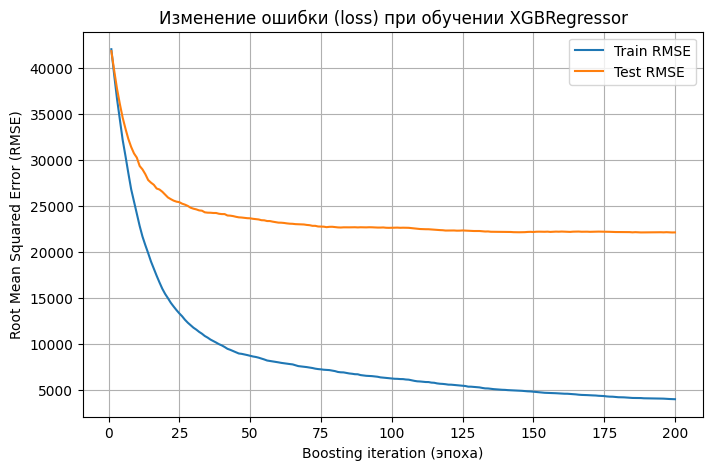

Test  MSE:  488966272.0000
Test  RMSE: 22112.5818
Test  R²:   0.7491


In [31]:
# История изменения loss
results = xgb.evals_result()

train_loss = results['validation_0']['rmse']
test_loss = results['validation_1']['rmse']
epochs = range(1, len(train_loss) + 1)

# График изменения ошибки
plt.figure(figsize=(8,5))
plt.plot(epochs, train_loss, label='Train RMSE')
plt.plot(epochs, test_loss, label='Test RMSE')
plt.xlabel('Boosting iteration (эпоха)')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('Изменение ошибки (loss) при обучении XGBRegressor')
plt.legend()
plt.grid(True)
plt.show()

y_test_pred = xgb.predict(X_test)

test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Test  MSE:  {test_mse:.4f}")
print(f"Test  RMSE: {test_rmse:.4f}")
print(f"Test  R²:   {test_r2:.4f}")
